In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import shutil, os, glob
from xml.etree import ElementTree
df = pd.read_csv('cropped_dfV2.csv') 

In [2]:
y=df['label']
X = df.drop(['label'], axis=1)
y.value_counts()

with_mask                2877
without_mask              608
mask_incorrectly_worn     118
Name: label, dtype: int64

In [3]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
print(X_train.shape,X_test.shape)

(2702, 4) (901, 4)


In [4]:
y_train.value_counts()

with_mask                2158
without_mask              456
mask_incorrectly_worn      88
Name: label, dtype: int64

In [5]:
y_test.value_counts()

with_mask                719
without_mask             152
mask_incorrectly_worn     30
Name: label, dtype: int64

In [6]:
#Get all images width and height to obtain the best image size to use in the training 
np.mean(X_train['image_width'])

38.25647668393783

In [7]:
#Get all images width and height to obtain the best image size to use in the training 
np.mean(X_train['image_height'])

34.27017024426351

In [8]:
#So the target image size will be 32, the closest number used in image size as it has multiple factors of 2

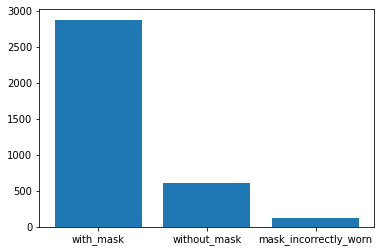

In [9]:
classes = ('with_mask', 'without_mask', 'mask_incorrectly_worn')
plt.bar(classes, y.value_counts())
plt.show()

In [10]:
########################### Augmentation ########################
#Augmentation is applied on the train data only 

In [11]:
#Create dataFrame of train data alonf with their label
df_train = X_train
df_train['label'] = y_train
df_train

,Unnamed: 0,cropped_image_file,image_width,image_height,label
2772,3125,maksssksksss680-3125.png,20,17,with_mask
1669,1812,maksssksksss444-1812.png,38,40,with_mask
2020,2238,maksssksksss52-2238.png,17,17,with_mask
1187,1282,maksssksksss333-1282.png,127,105,with_mask
71,72,maksssksksss110-72.png,43,56,without_mask
...,...,...,...,...,...
250,255,maksssksksss149-255.png,32,28,with_mask
3300,3739,maksssksksss795-3739.png,22,18,with_mask
382,401,maksssksksss180-401.png,134,107,with_mask
2433,2740,maksssksksss603-2740.png,13,13,with_mask


In [12]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
       # rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True,
        fill_mode='nearest')

In [13]:
########Augmentation for 'mask_incorrectly_worn' class ###########
tempDFMIW = pd.DataFrame(data=df_train[df_train['label'] == 'mask_incorrectly_worn'])
filenameMIW = tempDFMIW['cropped_image_file'].values
batch_sizeMIW = len(filenameMIW)
for i, file in enumerate(filenameMIW):
    filenameMIW[i] =  filenameMIW[i][:-4] #to delet suffix '.png'
    pic = load_img('cropped_images/'+file)
    pic_array = img_to_array(pic)
    pic_array = pic_array.reshape((1,) + pic_array.shape)
    
    count = 0
    for batch in datagen.flow(pic_array, batch_size=batch_sizeMIW, save_prefix=(filenameMIW[i]),save_to_dir='Augmented_MIW', save_format='.png'):
        count += 1  
        if count > 22:
            break
#Create new data frame for the Augmented cases from MIW class
df_Augmented_MIW = pd.DataFrame(columns=['cropped_image_file', 'label'])
names_Augmented_MIW = os.listdir('Augmented_MIW')
df_Augmented_MIW['cropped_image_file'] = names_Augmented_MIW
df_Augmented_MIW['label'] = 'mask_incorrectly_worn'
df_Augmented_MIW

,cropped_image_file,label
0,maksssksksss11-47_0_1024..png,mask_incorrectly_worn
1,maksssksksss11-47_0_1041..png,mask_incorrectly_worn
2,maksssksksss11-47_0_1145..png,mask_incorrectly_worn
3,maksssksksss11-47_0_1263..png,mask_incorrectly_worn
4,maksssksksss11-47_0_1422..png,mask_incorrectly_worn
...,...,...
6042,maksssksksss94-4057_0_9584..png,mask_incorrectly_worn
6043,maksssksksss94-4057_0_9684..png,mask_incorrectly_worn
6044,maksssksksss94-4057_0_9799..png,mask_incorrectly_worn
6045,maksssksksss94-4057_0_9842..png,mask_incorrectly_worn


In [14]:
########Augmentation for 'Without Mask' class ###########
tempDFWOM = pd.DataFrame(data=df_train[df_train['label'] == 'without_mask'])
filenameWOM = tempDFWOM['cropped_image_file'].values
batch_sizeWOM = len(filenameWOM)
for i, file in enumerate(filenameWOM):
    filenameWOM[i] =  filenameWOM[i][:-4] #to delet suffix '.png'
    pic = load_img('cropped_images/'+file)
    pic_array = img_to_array(pic)
    pic_array = pic_array.reshape((1,) + pic_array.shape)
    
    count = 0
    for batch in datagen.flow(pic_array, batch_size=batch_sizeWOM, save_prefix=(filenameWOM[i]),save_to_dir='Augmented_WOM', save_format='.png'):
        count += 1  
        if count > 3:
            break
#Create new data frame for the Augmented cases from MIW class
df_Augmented_WOM = pd.DataFrame(columns=['cropped_image_file', 'label'])
names_Augmented_WOM = os.listdir('Augmented_WOM')
df_Augmented_WOM['cropped_image_file'] = names_Augmented_WOM
df_Augmented_WOM['label'] = 'without_mask'
df_Augmented_WOM

,cropped_image_file,label
0,maksssksksss0-2_0_1870..png,without_mask
1,maksssksksss0-2_0_2972..png,without_mask
2,maksssksksss0-2_0_3279..png,without_mask
3,maksssksksss0-2_0_3519..png,without_mask
4,maksssksksss0-2_0_4149..png,without_mask
...,...,...
5464,maksssksksss96-4062_0_6815..png,without_mask
5465,maksssksksss96-4062_0_7238..png,without_mask
5466,maksssksksss96-4062_0_7759..png,without_mask
5467,maksssksksss96-4062_0_8446..png,without_mask


In [15]:
#Combine the two Augmented dataframes with df_train

#Drop the other colmns in df_train and leav only the label and the cropped image name 
df_train.drop(['image_width', 'image_height', 'Unnamed: 0'], axis=1, inplace=True)

In [16]:
frames = [df_train, df_Augmented_WOM, df_Augmented_MIW]
df_train_all = pd.concat(frames)
df_train_all.to_csv('df_train.csv', index = False)
df_train_all

,cropped_image_file,label
2772,maksssksksss680-3125.png,with_mask
1669,maksssksksss444-1812.png,with_mask
2020,maksssksksss52-2238.png,with_mask
1187,maksssksksss333-1282.png,with_mask
71,maksssksksss110-72.png,without_mask
...,...,...
6042,maksssksksss94-4057_0_9584..png,mask_incorrectly_worn
6043,maksssksksss94-4057_0_9684..png,mask_incorrectly_worn
6044,maksssksksss94-4057_0_9799..png,mask_incorrectly_worn
6045,maksssksksss94-4057_0_9842..png,mask_incorrectly_worn


In [17]:
# Edit and save Test dataFrame 
df_test = X_test
df_test['label'] = y_test
#df_test.drop(['image_width', 'image_height', 'Unnamed: 0'], axis=1, inplace=True)
df_test.to_csv('df_test.csv', index = False)
df_test

,Unnamed: 0,cropped_image_file,image_width,image_height,label
2375,2619,maksssksksss586-2619.png,49,30,with_mask
1153,1248,maksssksksss327-1248.png,49,44,without_mask
1532,1660,maksssksksss416-1660.png,20,23,with_mask
1922,2076,maksssksksss50-2076.png,31,36,with_mask
1731,1875,maksssksksss453-1875.png,17,13,without_mask
...,...,...,...,...,...
49,49,maksssksksss11-49.png,43,29,with_mask
1499,1620,maksssksksss410-1620.png,23,28,with_mask
2451,2787,maksssksksss61-2787.png,18,16,without_mask
125,128,maksssksksss119-128.png,13,12,with_mask
